## Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv("covid_19_india.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [4]:
df = df.drop(columns=['Sno', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational', 'ConfirmedForeignNational'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       18110 non-null  object
 1   Cured      18110 non-null  int64 
 2   Deaths     18110 non-null  int64 
 3   Confirmed  18110 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 566.1+ KB


In [6]:
df.tail(10)

,Date,Cured,Deaths,Confirmed
18100,2021-08-11,119115,1800,121766
18101,2021-08-11,582791,16322,599573
18102,2021-08-11,944700,8954,953851
18103,2021-08-11,25095,356,28018
18104,2021-08-11,2524400,34367,2579130
18105,2021-08-11,638410,3831,650353
18106,2021-08-11,77811,773,80660
18107,2021-08-11,334650,7368,342462
18108,2021-08-11,1685492,22775,1708812
18109,2021-08-11,1506532,18252,1534999


In [7]:
df = df.groupby('Date').agg({
    'Cured': 'sum',
    'Deaths': 'sum',
    'Confirmed': 'sum'
}).reset_index()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       560 non-null    object
 1   Cured      560 non-null    int64 
 2   Deaths     560 non-null    int64 
 3   Confirmed  560 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 17.6+ KB


In [9]:
df.tail(10)

,Date,Cured,Deaths,Confirmed
550,2021-08-02,30857467,424773,31695958
551,2021-08-03,30896354,425195,31726507
552,2021-08-04,30933022,425757,31769132
553,2021-08-05,30974748,426290,31812114
554,2021-08-06,31015844,426754,31856757
555,2021-08-07,31055861,427371,31895385
556,2021-08-08,31099771,427862,31934455
557,2021-08-09,31139457,428309,31969954
558,2021-08-10,31180968,428682,31998158
559,2021-08-11,31220981,429179,32036511


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.head()

,Date,Cured,Deaths,Confirmed
0,2020-01-30,0,0,1
1,2020-01-31,0,0,1
2,2020-02-01,0,0,2
3,2020-02-02,0,0,3
4,2020-02-03,0,0,3


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       560 non-null    datetime64[ns]
 1   Cured      560 non-null    int64         
 2   Deaths     560 non-null    int64         
 3   Confirmed  560 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 17.6 KB


In [13]:
df.tail(10)

,Date,Cured,Deaths,Confirmed
550,2021-08-02,30857467,424773,31695958
551,2021-08-03,30896354,425195,31726507
552,2021-08-04,30933022,425757,31769132
553,2021-08-05,30974748,426290,31812114
554,2021-08-06,31015844,426754,31856757
555,2021-08-07,31055861,427371,31895385
556,2021-08-08,31099771,427862,31934455
557,2021-08-09,31139457,428309,31969954
558,2021-08-10,31180968,428682,31998158
559,2021-08-11,31220981,429179,32036511


## Data Visualisation

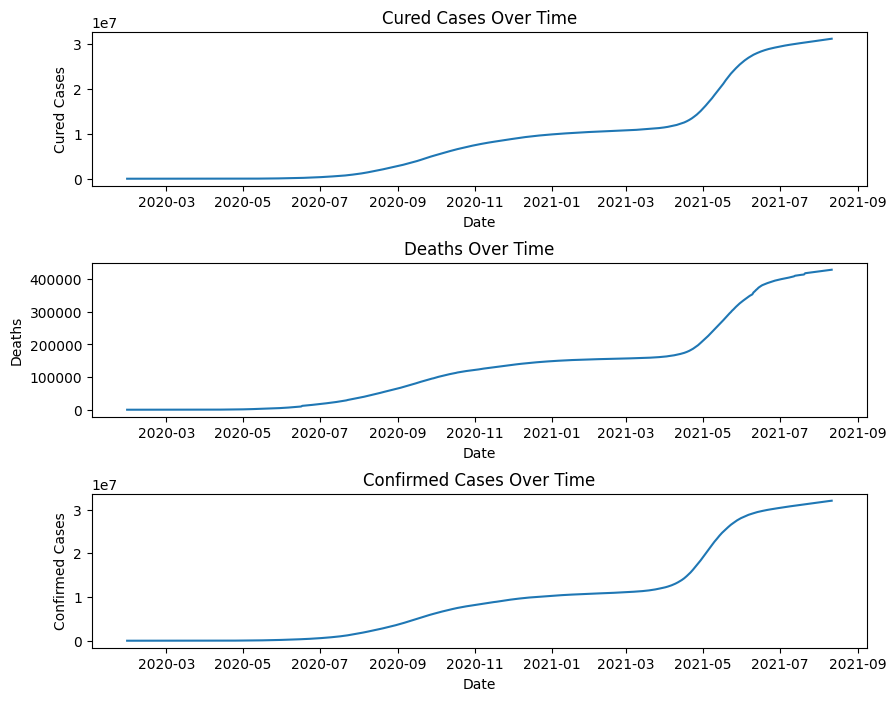

In [14]:
# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

# Subplot 1: Cured
ax1.plot(df['Date'], df['Cured'])
ax1.set_xlabel('Date')
ax1.set_ylabel('Cured Cases')
ax1.set_title('Cured Cases Over Time')

# Subplot 2: Deaths
ax2.plot(df['Date'], df['Deaths'])
ax2.set_xlabel('Date')
ax2.set_ylabel('Deaths')
ax2.set_title('Deaths Over Time')

# Subplot 3: Confirmed
ax3.plot(df['Date'], df['Confirmed'])
ax3.set_xlabel('Date')
ax3.set_ylabel('Confirmed Cases')
ax3.set_title('Confirmed Cases Over Time')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()

## Making the data Stationary

In [15]:
def make_stationary(series):
    series_diff = series.diff().dropna()
    return series_diff

In [16]:
df['Cured_diff'] = make_stationary(df['Cured'])
df['Deaths_diff'] = make_stationary(df['Deaths'])
df['Confirmed_diff'] = make_stationary(df['Confirmed'])

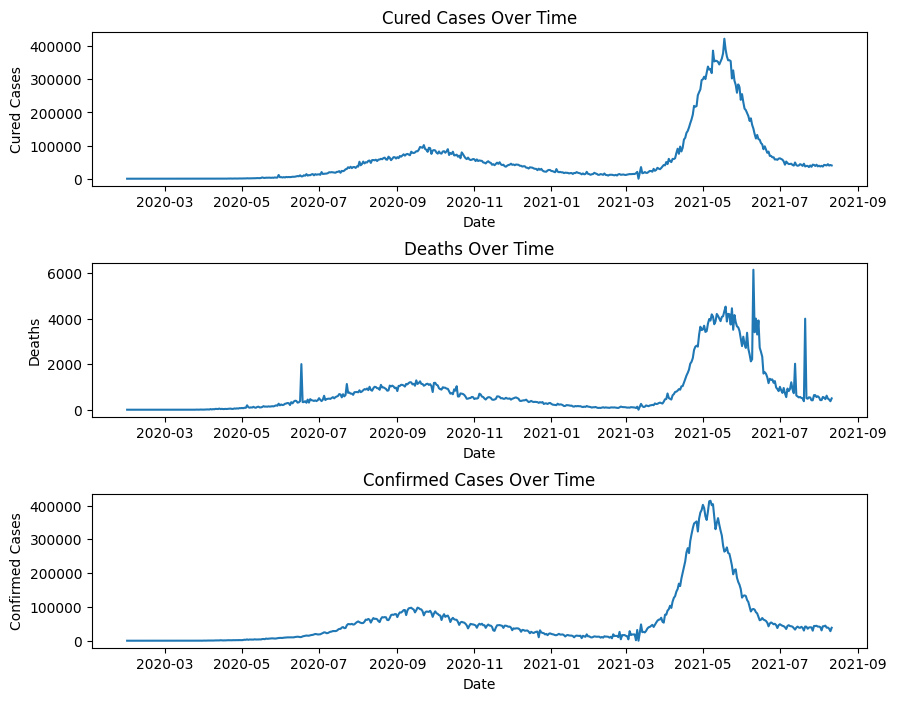

In [17]:
# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

# Subplot 1: Cured
ax1.plot(df['Date'], df['Cured_diff'])
ax1.set_xlabel('Date')
ax1.set_ylabel('Cured Cases')
ax1.set_title('Cured Cases Over Time')

# Subplot 2: Deaths
ax2.plot(df['Date'], df['Deaths_diff'])
ax2.set_xlabel('Date')
ax2.set_ylabel('Deaths')
ax2.set_title('Deaths Over Time')

# Subplot 3: Confirmed
ax3.plot(df['Date'], df['Confirmed_diff'])
ax3.set_xlabel('Date')
ax3.set_ylabel('Confirmed Cases')
ax3.set_title('Confirmed Cases Over Time')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()

## Prediction Using ARIMA Model

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [19]:
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    print('\n')

In [20]:
adf_test(df['Cured_diff'], 'Cured_diff')
adf_test(df['Deaths_diff'], 'Deaths_diff')
adf_test(df['Confirmed_diff'], 'Confirmed_diff')

Augmented Dickey-Fuller Test: Cured_diff
ADF Test Statistic              -3.537215
p-value                          0.007081
#Lags Used                      16.000000
Number of Observations Used    542.000000
Critical Value (1%)             -3.442473
Critical Value (5%)             -2.866887
Critical Value (10%)            -2.569618


Augmented Dickey-Fuller Test: Deaths_diff
ADF Test Statistic              -2.451592
p-value                          0.127701
#Lags Used                      18.000000
Number of Observations Used    540.000000
Critical Value (1%)             -3.442518
Critical Value (5%)             -2.866907
Critical Value (10%)            -2.569629


Augmented Dickey-Fuller Test: Confirmed_diff
ADF Test Statistic              -3.151168
p-value                          0.022991
#Lags Used                      16.000000
Number of Observations Used    542.000000
Critical Value (1%)             -3.442473
Critical Value (5%)             -2.866887
Critical Value (10%)        

In [21]:
def fit_forecast_evaluate(series, order, steps):
    # Split the data into train and test sets
    train_size = int(len(series) * 0.8)
    train, test = series[:train_size], series[train_size:]
    
    # Fit the ARIMA model
    model = ARIMA(train, order=order)
    model_fit = model.fit()
    
    # Forecast the next steps
    start = len(train)
    end = len(train) + len(test) - 1
    predictions = model_fit.predict(start=start, end=end, typ='levels')
    
    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(test, predictions))
    mae = mean_absolute_error(test, predictions)
    mape = np.mean(np.abs((test - predictions) / test)) * 100
    
    # Forecast future steps
    model_full = ARIMA(series, order=order)
    model_full_fit = model_full.fit()
    forecast = model_full_fit.forecast(steps=steps)
    forecast = forecast.astype(int)
    
    return model_fit, forecast, rmse, mae, mape

In [22]:
p, d, q = 3, 2, 1
forecast_steps = 30

In [23]:
cured_fit, cured_forecast, cured_rmse, cured_mae, cured_mape = fit_forecast_evaluate(df['Cured_diff'], (p, d, q), forecast_steps)
deaths_fit, deaths_forecast, deaths_rmse, deaths_mae, deaths_mape = fit_forecast_evaluate(df['Deaths_diff'], (p, d, q), forecast_steps)
confirmed_fit, confirmed_forecast, confirmed_rmse, confirmed_mae, confirmed_mape = fit_forecast_evaluate(df['Confirmed_diff'], (p, d, q), forecast_steps)

C:\Users\funin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\funin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\funin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [24]:
last_date = df['Date'].iloc[-1]
forecast_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=forecast_steps)

In [25]:
arima_forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Cured_Forecast': cured_forecast,
    'Deaths_Forecast': deaths_forecast,
    'Confirmed_Forecast': confirmed_forecast
})
arima_forecast_df.head()

,Date,Cured_Forecast,Deaths_Forecast,Confirmed_Forecast
560,2021-08-12,40829,449,38049
561,2021-08-13,40668,453,36014
562,2021-08-14,40718,450,35165
563,2021-08-15,40680,459,35398
564,2021-08-16,40745,455,35312


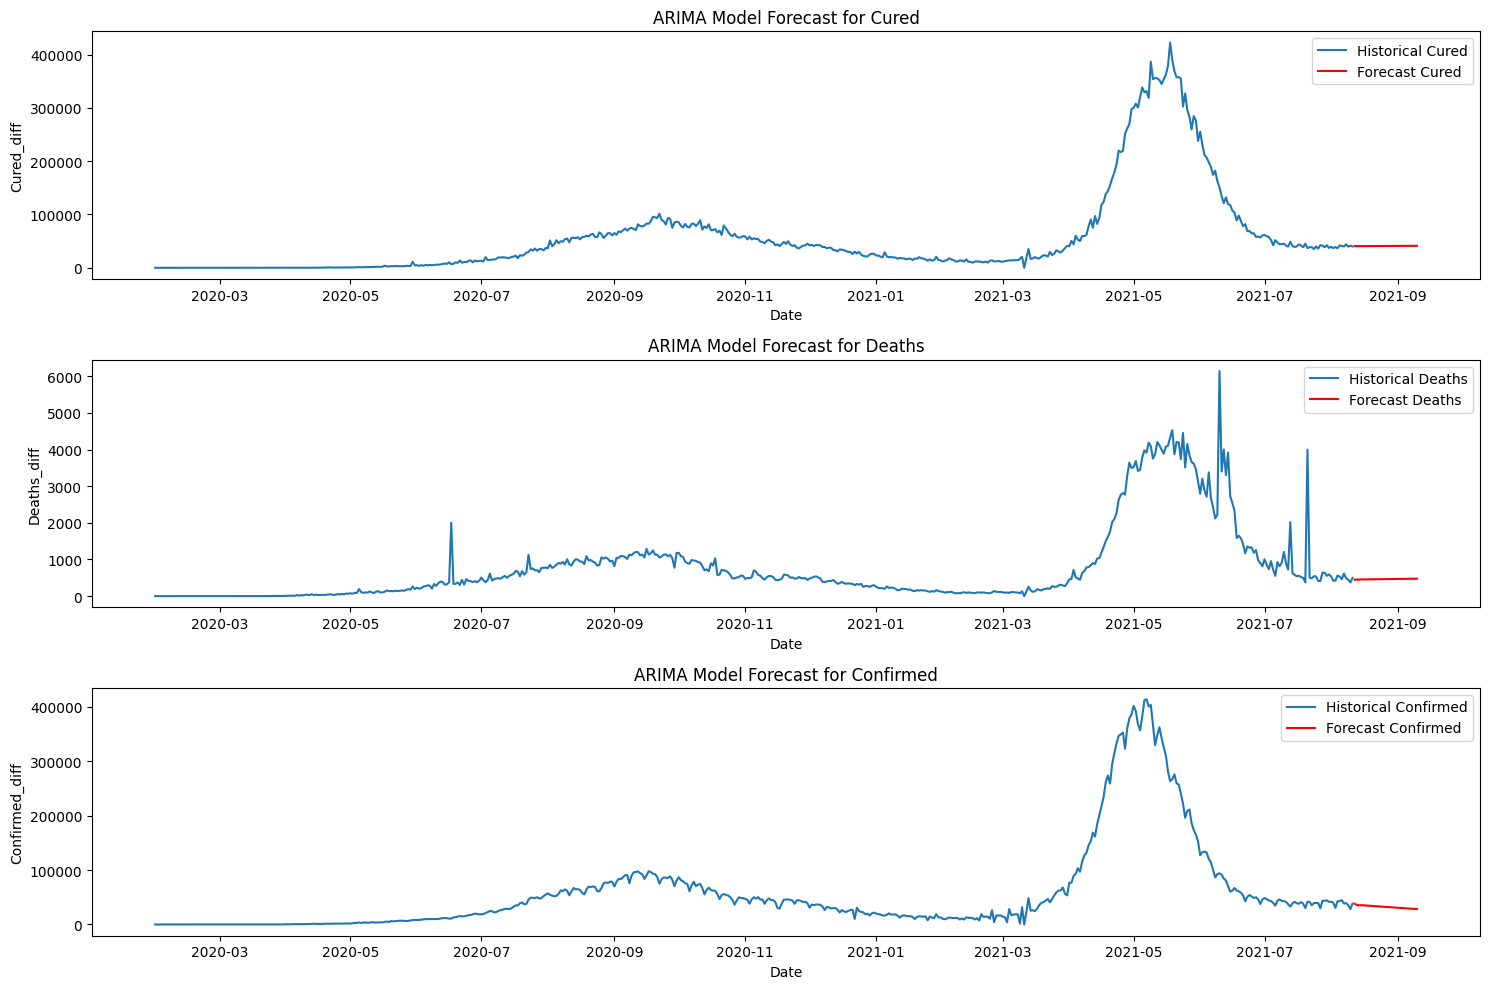

In [26]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(df['Date'], df['Cured_diff'], label='Historical Cured')
plt.plot(arima_forecast_df['Date'], arima_forecast_df['Cured_Forecast'], label='Forecast Cured', color='red')
plt.xlabel('Date')
plt.ylabel('Cured_diff')
plt.title('ARIMA Model Forecast for Cured')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df['Date'], df['Deaths_diff'], label='Historical Deaths')
plt.plot(arima_forecast_df['Date'], arima_forecast_df['Deaths_Forecast'], label='Forecast Deaths', color='red')
plt.xlabel('Date')
plt.ylabel('Deaths_diff')
plt.title('ARIMA Model Forecast for Deaths')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df['Date'], df['Confirmed_diff'], label='Historical Confirmed')
plt.plot(arima_forecast_df['Date'], arima_forecast_df['Confirmed_Forecast'], label='Forecast Confirmed', color='red')
plt.xlabel('Date')
plt.ylabel('Confirmed_diff')
plt.title('ARIMA Model Forecast for Confirmed')
plt.legend()

plt.tight_layout()
plt.show()

### RMSE, MAE and MAPE values

In [27]:
print(f'Cured RMSE: {cured_rmse}, MAE: {cured_mae}, MAPE: {cured_mape}')
print(f'Deaths RMSE: {deaths_rmse}, MAE: {deaths_mae}, MAPE: {deaths_mape}')
print(f'Confirmed RMSE: {confirmed_rmse}, MAE: {confirmed_mae}, MAPE: {confirmed_mape}')

Cured RMSE: 609865.7827649083, MAE: 488416.35688195616, MAPE: 952.0741121083878
Deaths RMSE: 4199.318704224485, MAE: 3341.745290242598, MAPE: 468.40130288018827
Confirmed RMSE: 983291.7963996971, MAE: 836913.6654508057, MAPE: 1727.969928365189


## Prediction Using Sarima Model

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

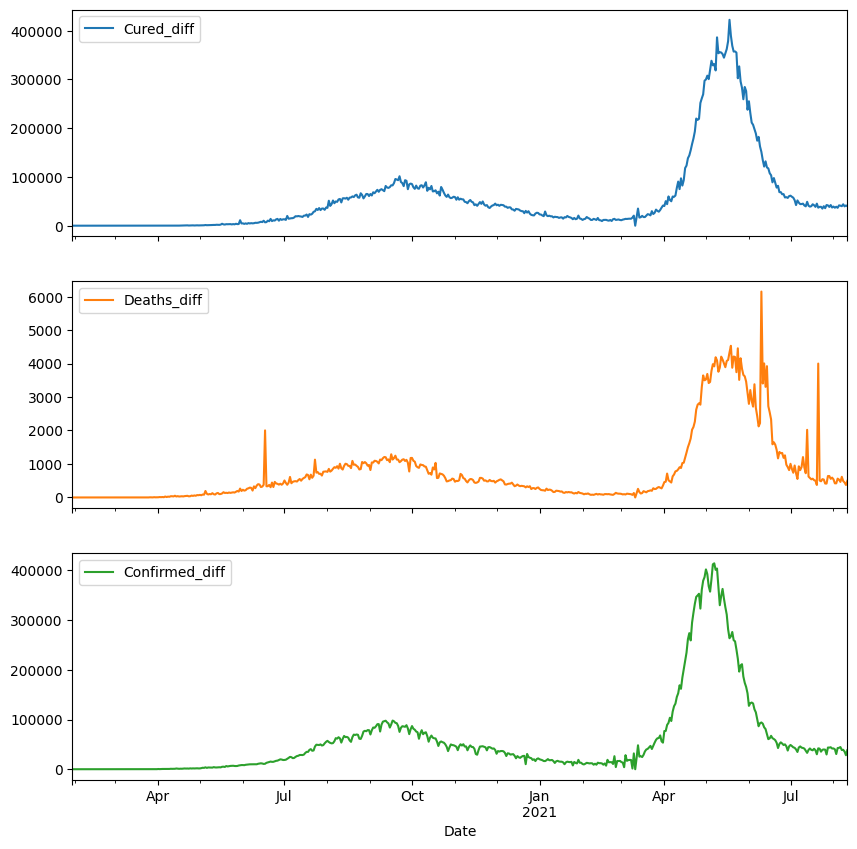

In [29]:
df.plot(x='Date', y=['Cured_diff', 'Deaths_diff', 'Confirmed_diff'], subplots=True, layout=(3, 1), figsize=(10, 10))
plt.show()

In [30]:
def make_stationary(series):
    series_diff = series.diff().dropna()
    return series_diff

In [31]:
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    print('\n')

In [32]:
adf_test(df['Cured_diff'], 'Cured_diff')
adf_test(df['Deaths_diff'], 'Deaths_diff')
adf_test(df['Confirmed_diff'], 'Confirmed_diff')

Augmented Dickey-Fuller Test: Cured_diff
ADF Test Statistic              -3.537215
p-value                          0.007081
#Lags Used                      16.000000
Number of Observations Used    542.000000
Critical Value (1%)             -3.442473
Critical Value (5%)             -2.866887
Critical Value (10%)            -2.569618


Augmented Dickey-Fuller Test: Deaths_diff
ADF Test Statistic              -2.451592
p-value                          0.127701
#Lags Used                      18.000000
Number of Observations Used    540.000000
Critical Value (1%)             -3.442518
Critical Value (5%)             -2.866907
Critical Value (10%)            -2.569629


Augmented Dickey-Fuller Test: Confirmed_diff
ADF Test Statistic              -3.151168
p-value                          0.022991
#Lags Used                      16.000000
Number of Observations Used    542.000000
Critical Value (1%)             -3.442473
Critical Value (5%)             -2.866887
Critical Value (10%)        

In [33]:
def fit_forecast_evaluate(series, order, seasonal_order, steps):
    # Split the data into train and test sets
    train_size = int(len(series) * 0.8)
    train, test = series[:train_size], series[train_size:]
    
    # Fit the SARIMA model
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    
    # Forecast the next steps
    start = len(train)
    end = len(train) + len(test) - 1
    predictions = model_fit.predict(start=start, end=end, typ='levels')
    
    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(test, predictions))
    mae = mean_absolute_error(test, predictions)
    mape = np.mean(np.abs((test - predictions) / test)) * 100
    
    # Forecast future steps
    model_full = SARIMAX(series, order=order, seasonal_order=seasonal_order)
    model_full_fit = model_full.fit(disp=False)
    forecast = model_full_fit.forecast(steps=steps)
    forecast = forecast.astype(int)
    
    return model_fit, forecast, rmse, mae, mape

In [34]:
p, d, q = 1, 1, 1  # Non-seasonal order
P, D, Q, s = 1, 1, 1, 12  # Seasonal order (assuming monthly data with yearly seasonality)
forecast_steps = 30

In [35]:
cured_fit, cured_forecast, cured_rmse, cured_mae, cured_mape = fit_forecast_evaluate(df['Cured_diff'], (p, d, q), (P, D, Q, s), forecast_steps)
deaths_fit, deaths_forecast, deaths_rmse, deaths_mae, deaths_mape = fit_forecast_evaluate(df['Deaths_diff'], (p, d, q), (P, D, Q, s), forecast_steps)
confirmed_fit, confirmed_forecast, confirmed_rmse, confirmed_mae, confirmed_mape = fit_forecast_evaluate(df['Confirmed_diff'], (p, d, q), (P, D, Q, s), forecast_steps)

C:\Users\funin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\funin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\funin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [36]:
last_date = df['Date'].iloc[-1]
forecast_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=forecast_steps)

In [37]:
sarima_forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Cured_Forecast': cured_forecast,
    'Deaths_Forecast': deaths_forecast,
    'Confirmed_Forecast': confirmed_forecast
})
sarima_forecast_df.head()

,Date,Cured_Forecast,Deaths_Forecast,Confirmed_Forecast
560,2021-08-12,38628,428,37100
561,2021-08-13,40051,448,36997
562,2021-08-14,38797,497,36816
563,2021-08-15,39562,410,36442
564,2021-08-16,38492,446,37860


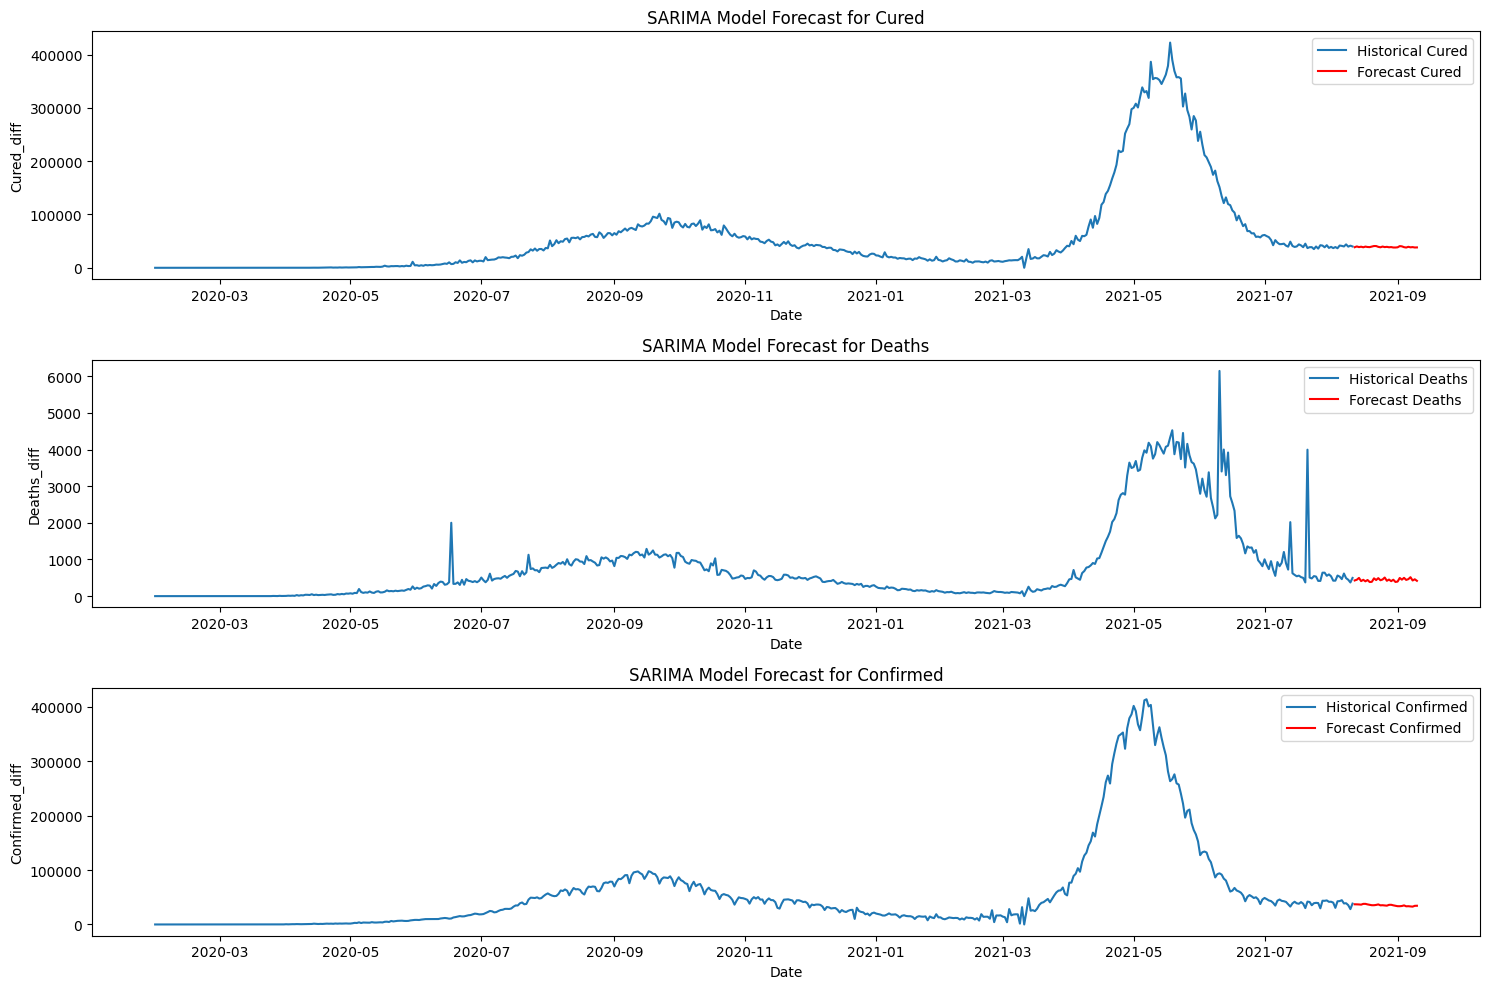

In [38]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(df['Date'], df['Cured_diff'], label='Historical Cured')
plt.plot(sarima_forecast_df['Date'], sarima_forecast_df['Cured_Forecast'], label='Forecast Cured', color='red')
plt.xlabel('Date')
plt.ylabel('Cured_diff')
plt.title('SARIMA Model Forecast for Cured')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df['Date'], df['Deaths_diff'], label='Historical Deaths')
plt.plot(sarima_forecast_df['Date'], sarima_forecast_df['Deaths_Forecast'], label='Forecast Deaths', color='red')
plt.xlabel('Date')
plt.ylabel('Deaths_diff')
plt.title('SARIMA Model Forecast for Deaths')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df['Date'], df['Confirmed_diff'], label='Historical Confirmed')
plt.plot(sarima_forecast_df['Date'], sarima_forecast_df['Confirmed_Forecast'], label='Forecast Confirmed', color='red')
plt.xlabel('Date')
plt.ylabel('Confirmed_diff')
plt.title('SARIMA Model Forecast for Confirmed')
plt.legend()

plt.tight_layout()
plt.show()

In [39]:
print(f'Cured RMSE: {cured_rmse}, MAE: {cured_mae}, MAPE: {cured_mape}')
print(f'Deaths RMSE: {deaths_rmse}, MAE: {deaths_mae}, MAPE: {deaths_mape}')
print(f'Confirmed RMSE: {confirmed_rmse}, MAE: {confirmed_mae}, MAPE: {confirmed_mape}')

Cured RMSE: 170555.099013265, MAE: 155612.75270665274, MAPE: 250.7800701060169
Deaths RMSE: 1595.2946745865024, MAE: 1470.1852845440183, MAPE: 132.83489391356764
Confirmed RMSE: 417618.94432702044, MAE: 357709.68618429906, MAPE: 735.2627567764856


## Prediction using facebook's Prophet Model

In [40]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [41]:
def prepare_prophet_data(series, date_series):
    df_prophet = pd.DataFrame({'ds': date_series, 'y': series})
    return df_prophet

In [42]:
df_cured_prophet = prepare_prophet_data(df['Cured_diff'], df['Date'])
df_deaths_prophet = prepare_prophet_data(df['Deaths_diff'], df['Date'])
df_confirmed_prophet = prepare_prophet_data(df['Confirmed_diff'], df['Date'])

In [43]:
# Function to fit Prophet model, forecast, and evaluate
def fit_forecast_evaluate_prophet(df, steps):
    # Fit the Prophet model on the entire dataset
    model = Prophet()
    model.fit(df)
    
    # Make predictions for the next 'steps' days
    future_full = model.make_future_dataframe(periods=steps, freq='D')
    forecast_full = model.predict(future_full)
    forecast_full = forecast_full[['ds', 'yhat']].tail(steps)
    forecast_full['yhat'] = forecast_full['yhat'].astype(int)
    
    # Evaluate the model
    train_size = len(df) - steps  # Use all data except the last 'steps' days for training
    train = df.iloc[:train_size]
    test = df.iloc[train_size:]
    
    # Refit the model on training data to evaluate on test data
    model_train = Prophet()
    model_train.fit(train)
    
    future_train = model_train.make_future_dataframe(periods=len(test), freq='D')
    forecast_train = model_train.predict(future_train)
    
    test_predictions = forecast_train['yhat'].iloc[-len(test):].values
    test_true = test['y'].values
    
    rmse = np.sqrt(mean_squared_error(test_true, test_predictions))
    mae = mean_absolute_error(test_true, test_predictions)
    mape = np.mean(np.abs((test_true - test_predictions) / test_true)) * 100
    
    return model, forecast_full, rmse, mae, mape


In [44]:
forecast_steps = 30

In [45]:
cured_model, cured_forecast, cured_rmse, cured_mae, cured_mape = fit_forecast_evaluate_prophet(df_cured_prophet, forecast_steps)
deaths_model, deaths_forecast, deaths_rmse, deaths_mae, deaths_mape = fit_forecast_evaluate_prophet(df_deaths_prophet, forecast_steps)
confirmed_model, confirmed_forecast, confirmed_rmse, confirmed_mae, confirmed_mape = fit_forecast_evaluate_prophet(df_confirmed_prophet, forecast_steps)

23:47:01 - cmdstanpy - INFO - Chain [1] start processing
23:47:01 - cmdstanpy - INFO - Chain [1] done processing
23:47:01 - cmdstanpy - INFO - Chain [1] start processing
23:47:01 - cmdstanpy - INFO - Chain [1] done processing
23:47:02 - cmdstanpy - INFO - Chain [1] start processing
23:47:02 - cmdstanpy - INFO - Chain [1] done processing
23:47:02 - cmdstanpy - INFO - Chain [1] start processing
23:47:02 - cmdstanpy - INFO - Chain [1] done processing
23:47:03 - cmdstanpy - INFO - Chain [1] start processing
23:47:03 - cmdstanpy - INFO - Chain [1] done processing
23:47:03 - cmdstanpy - INFO - Chain [1] start processing
23:47:03 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
prophet_forecast_df = pd.DataFrame({
    'Date': cured_forecast['ds'],
    'Cured_Forecast': cured_forecast['yhat'],
    'Deaths_Forecast': deaths_forecast['yhat'],
    'Confirmed_Forecast': confirmed_forecast['yhat']
})
prophet_forecast_df.head()

,Date,Cured_Forecast,Deaths_Forecast,Confirmed_Forecast
559,2021-08-12,134915,1990,120690
560,2021-08-13,135395,1947,120775
561,2021-08-14,136420,1979,120956
562,2021-08-15,137558,1946,120463
563,2021-08-16,133932,1924,117752


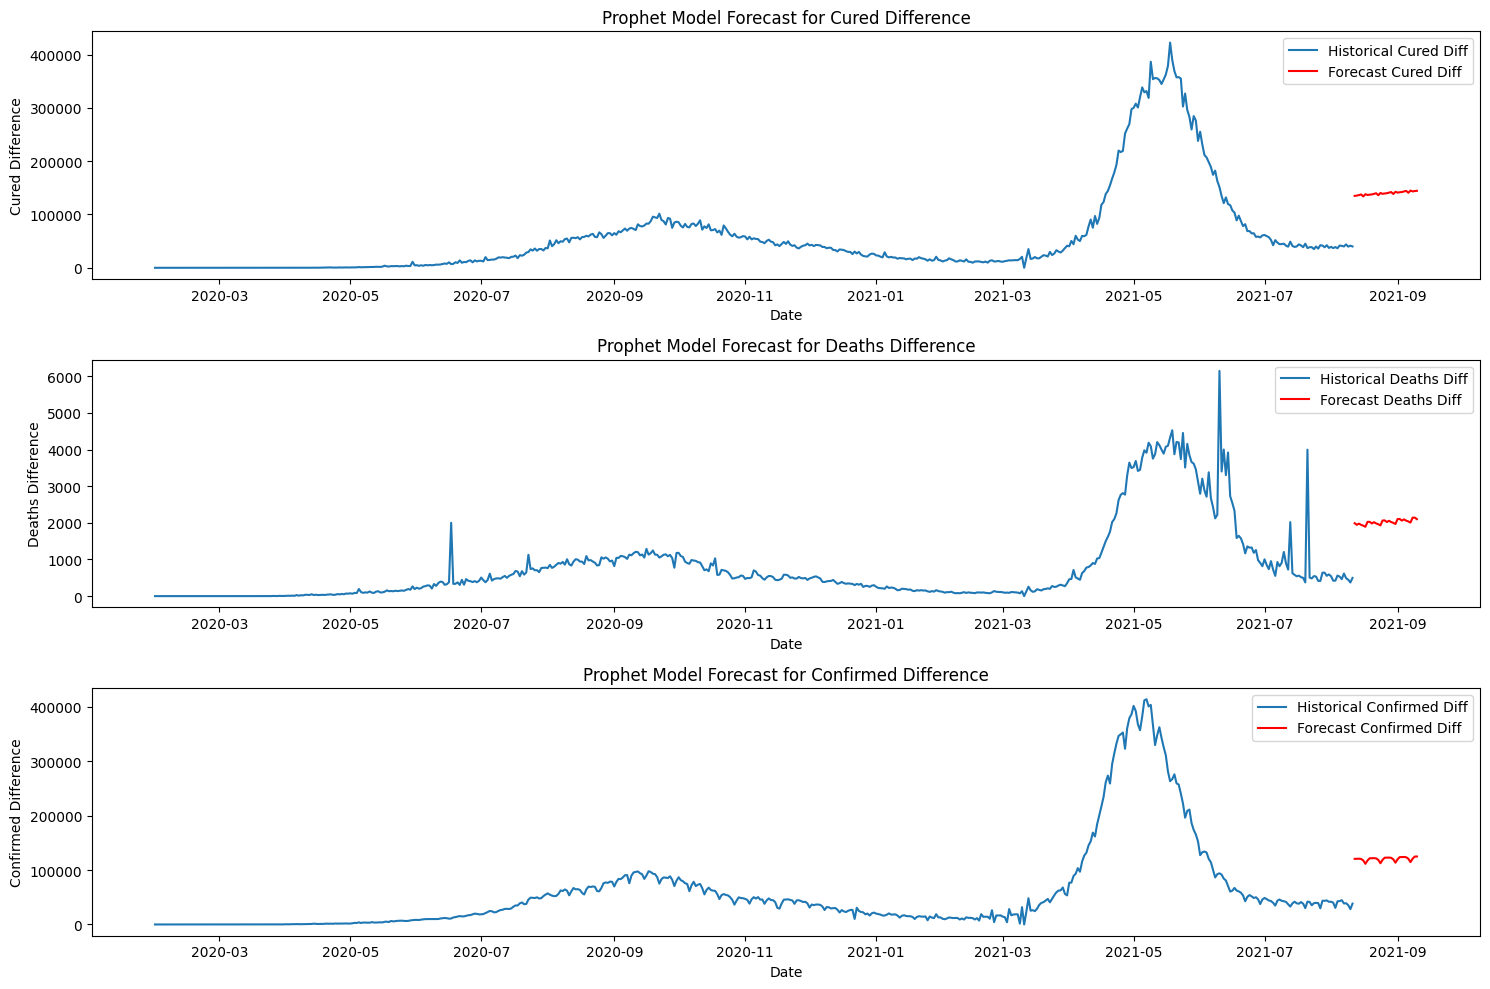

In [47]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(df['Date'], df['Cured_diff'], label='Historical Cured Diff')
plt.plot(prophet_forecast_df['Date'], prophet_forecast_df['Cured_Forecast'], label='Forecast Cured Diff', color='red')
plt.xlabel('Date')
plt.ylabel('Cured Difference')
plt.title('Prophet Model Forecast for Cured Difference')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df['Date'], df['Deaths_diff'], label='Historical Deaths Diff')
plt.plot(prophet_forecast_df['Date'], prophet_forecast_df['Deaths_Forecast'], label='Forecast Deaths Diff', color='red')
plt.xlabel('Date')
plt.ylabel('Deaths Difference')
plt.title('Prophet Model Forecast for Deaths Difference')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df['Date'], df['Confirmed_diff'], label='Historical Confirmed Diff')
plt.plot(prophet_forecast_df['Date'], prophet_forecast_df['Confirmed_Forecast'], label='Forecast Confirmed Diff', color='red')
plt.xlabel('Date')
plt.ylabel('Confirmed Difference')
plt.title('Prophet Model Forecast for Confirmed Difference')
plt.legend()

plt.tight_layout()
plt.show()

## Visualizing Combined Predictions

In [48]:
arima_forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 560 to 589
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                30 non-null     datetime64[ns]
 1   Cured_Forecast      30 non-null     int32         
 2   Deaths_Forecast     30 non-null     int32         
 3   Confirmed_Forecast  30 non-null     int32         
dtypes: datetime64[ns](1), int32(3)
memory usage: 732.0 bytes


In [49]:
sarima_forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 560 to 589
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                30 non-null     datetime64[ns]
 1   Cured_Forecast      30 non-null     int32         
 2   Deaths_Forecast     30 non-null     int32         
 3   Confirmed_Forecast  30 non-null     int32         
dtypes: datetime64[ns](1), int32(3)
memory usage: 732.0 bytes


In [50]:
prophet_forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 559 to 588
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                30 non-null     datetime64[ns]
 1   Cured_Forecast      30 non-null     int32         
 2   Deaths_Forecast     30 non-null     int32         
 3   Confirmed_Forecast  30 non-null     int32         
dtypes: datetime64[ns](1), int32(3)
memory usage: 732.0 bytes


In [51]:
combined_forecast_df = arima_forecast_df[['Date']].copy()
combined_forecast_df['ARIMA_Cured'] = arima_forecast_df['Cured_Forecast']
combined_forecast_df['SARIMA_Cured'] = sarima_forecast_df['Cured_Forecast']
combined_forecast_df['Prophet_Cured'] = prophet_forecast_df['Cured_Forecast']

combined_forecast_df['ARIMA_Deaths'] = arima_forecast_df['Deaths_Forecast']
combined_forecast_df['SARIMA_Deaths'] = sarima_forecast_df['Deaths_Forecast']
combined_forecast_df['Prophet_Deaths'] = prophet_forecast_df['Deaths_Forecast']

combined_forecast_df['ARIMA_Confirmed'] = arima_forecast_df['Confirmed_Forecast']
combined_forecast_df['SARIMA_Confirmed'] = sarima_forecast_df['Confirmed_Forecast']
combined_forecast_df['Prophet_Confirmed'] = prophet_forecast_df['Confirmed_Forecast']

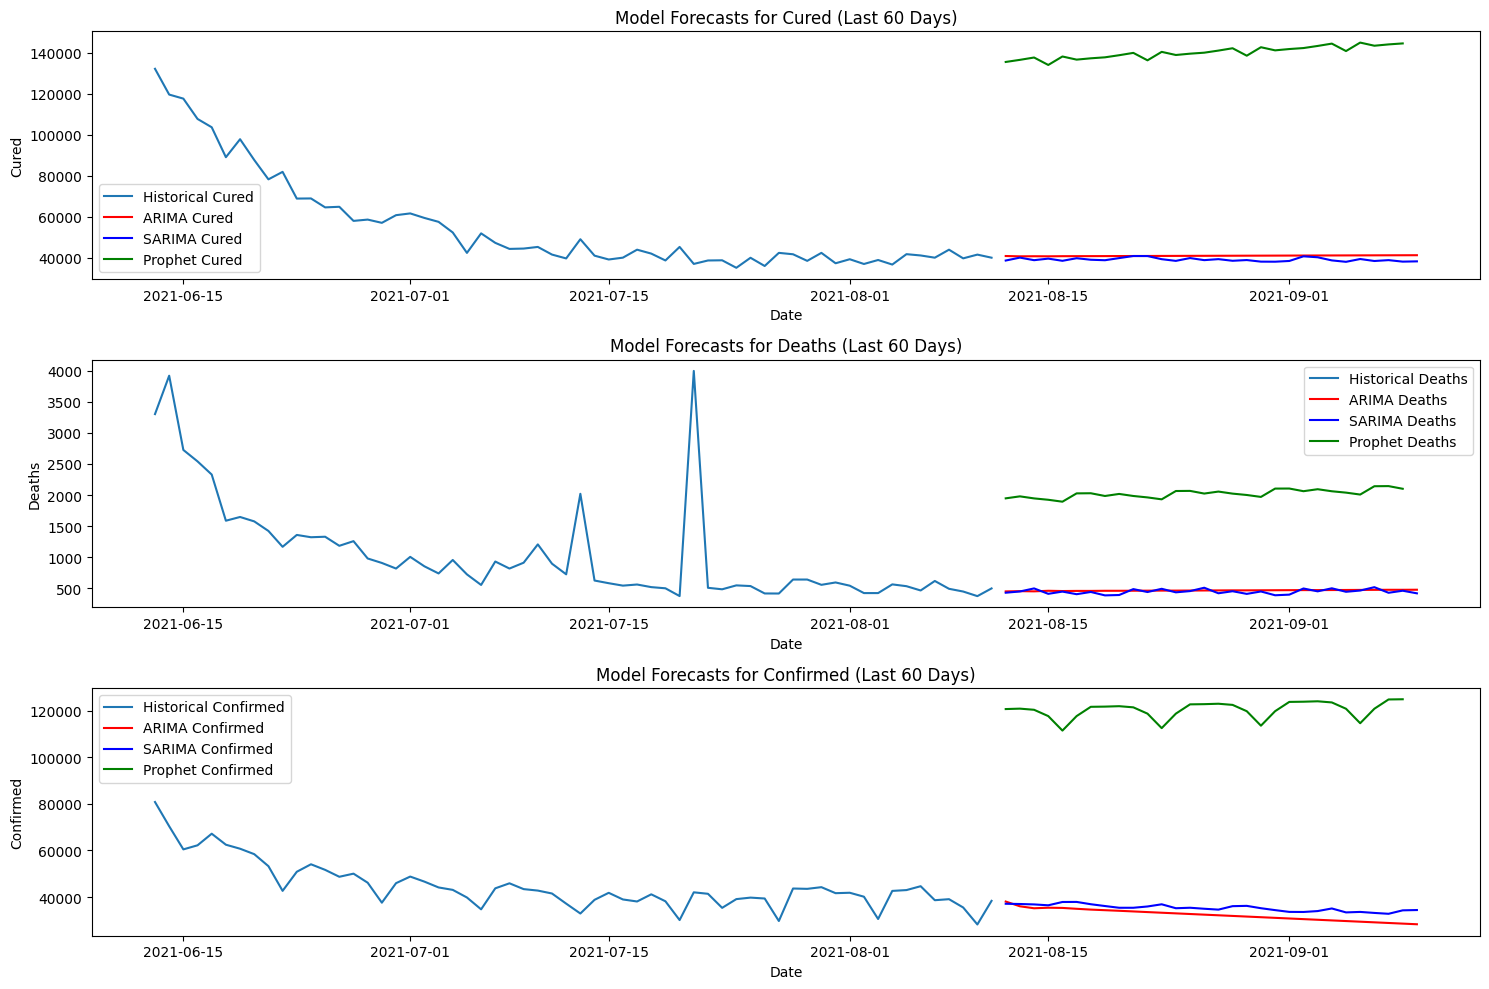

In [52]:
# Plot only the last 60 days
last_60_days_df = combined_forecast_df.tail(60)
last_60_days_historical_df = df.tail(60)

plt.figure(figsize=(15, 10))

# Plot Cured forecasts
plt.subplot(3, 1, 1)
plt.plot(last_60_days_historical_df['Date'], last_60_days_historical_df['Cured_diff'], label='Historical Cured')
plt.plot(last_60_days_df['Date'], last_60_days_df['ARIMA_Cured'], label='ARIMA Cured', color='red')
plt.plot(last_60_days_df['Date'], last_60_days_df['SARIMA_Cured'], label='SARIMA Cured', color='blue')
plt.plot(last_60_days_df['Date'], last_60_days_df['Prophet_Cured'], label='Prophet Cured', color='green')  # Adjusted color
plt.xlabel('Date')
plt.ylabel('Cured')
plt.title('Model Forecasts for Cured (Last 60 Days)')
plt.legend()

# Plot Deaths forecasts
plt.subplot(3, 1, 2)
plt.plot(last_60_days_historical_df['Date'], last_60_days_historical_df['Deaths_diff'], label='Historical Deaths')
plt.plot(last_60_days_df['Date'], last_60_days_df['ARIMA_Deaths'], label='ARIMA Deaths', color='red')
plt.plot(last_60_days_df['Date'], last_60_days_df['SARIMA_Deaths'], label='SARIMA Deaths', color='blue')
plt.plot(last_60_days_df['Date'], last_60_days_df['Prophet_Deaths'], label='Prophet Deaths', color='green')  # Adjusted color
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Model Forecasts for Deaths (Last 60 Days)')
plt.legend()

# Plot Confirmed forecasts
plt.subplot(3, 1, 3)
plt.plot(last_60_days_historical_df['Date'], last_60_days_historical_df['Confirmed_diff'], label='Historical Confirmed')
plt.plot(last_60_days_df['Date'], last_60_days_df['ARIMA_Confirmed'], label='ARIMA Confirmed', color='red')
plt.plot(last_60_days_df['Date'], last_60_days_df['SARIMA_Confirmed'], label='SARIMA Confirmed', color='blue')
plt.plot(last_60_days_df['Date'], last_60_days_df['Prophet_Confirmed'], label='Prophet Confirmed', color='green')  # Adjusted color
plt.xlabel('Date')
plt.ylabel('Confirmed')
plt.title('Model Forecasts for Confirmed (Last 60 Days)')
plt.legend()

plt.tight_layout()
plt.show()


## Mean, SE Mean, Standard Deviation, Minimum, Maximum, Skewness, Kurtosis

In [53]:
pd.options.display.float_format = '{:,.0f}'.format

In [54]:
mean_cured = df['Cured_diff'].mean()
mean_deaths = df['Deaths_diff'].mean()
mean_confirmed = df['Confirmed_diff'].mean()

In [55]:
std_cured = df['Cured_diff'].std()
std_deaths = df['Deaths_diff'].std()
std_confirmed = df['Confirmed_diff'].std()

In [56]:
min_cured = df['Cured_diff'].min()
min_deaths = df['Deaths_diff'].min()
min_confirmed = df['Confirmed_diff'].min()

In [57]:
max_cured = df['Cured_diff'].max()
max_deaths = df['Deaths_diff'].max()
max_confirmed = df['Confirmed_diff'].max()

In [58]:
skewness_cured = df['Cured_diff'].skew()
skewness_deaths = df['Deaths_diff'].skew()
skewness_confirmed = df['Confirmed_diff'].skew()

In [59]:
kurtosis_cured = df['Cured_diff'].kurtosis()
kurtosis_deaths = df['Deaths_diff'].kurtosis()
kurtosis_confirmed = df['Confirmed_diff'].kurtosis()

In [60]:
statistics_dict = {
    'Statistic': ['Mean', 'Standard Deviation', 'Minimum', 'Maximum', 'Skewness', 'Kurtosis'],
    'Cured': [mean_cured, std_cured, min_cured, max_cured, skewness_cured, kurtosis_cured],
    'Deaths': [mean_deaths, std_deaths, min_deaths, max_deaths, skewness_deaths, kurtosis_deaths],
    'Confirmed': [mean_confirmed, std_confirmed, min_confirmed, max_confirmed, skewness_confirmed, kurtosis_confirmed]
}

In [61]:
statistics_df = pd.DataFrame(statistics_dict)
statistics_df

,Statistic,Cured,Deaths,Confirmed
0,Mean,"55,851",768,"57,310"
1,Standard Deviation,"81,302","1,037","83,209"
2,Minimum,0,0,0
3,Maximum,"422,436","6,148","414,188"
4,Skewness,3,2,3
5,Kurtosis,6,5,7
